In [4]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset import MidiDataset
from config import *
print(torch.__version__)
print(torch.version.cuda)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.1+cu118
11.8


In [5]:
dataset = MidiDataset(
        midi_dir=DATASET_DIR,
        num_bars=NUM_BARS,
        steps_per_bar=STEPS_PER_BAR,
        use_sliding_window=USE_SLIDING_WINDOW,
        stride_in_bars=STRIDE_IN_BARS
    )

Found 2151 MIDI files.
Processing MIDI files and extracting segments...


Processing files: 100%|██████████| 2151/2151 [00:01<00:00, 1901.14it/s]

Successfully extracted 1853 segments from 2151 files.


## Reconstruction

Epoch 2
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_2.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_2.mid...
MIDI file saved successfully.


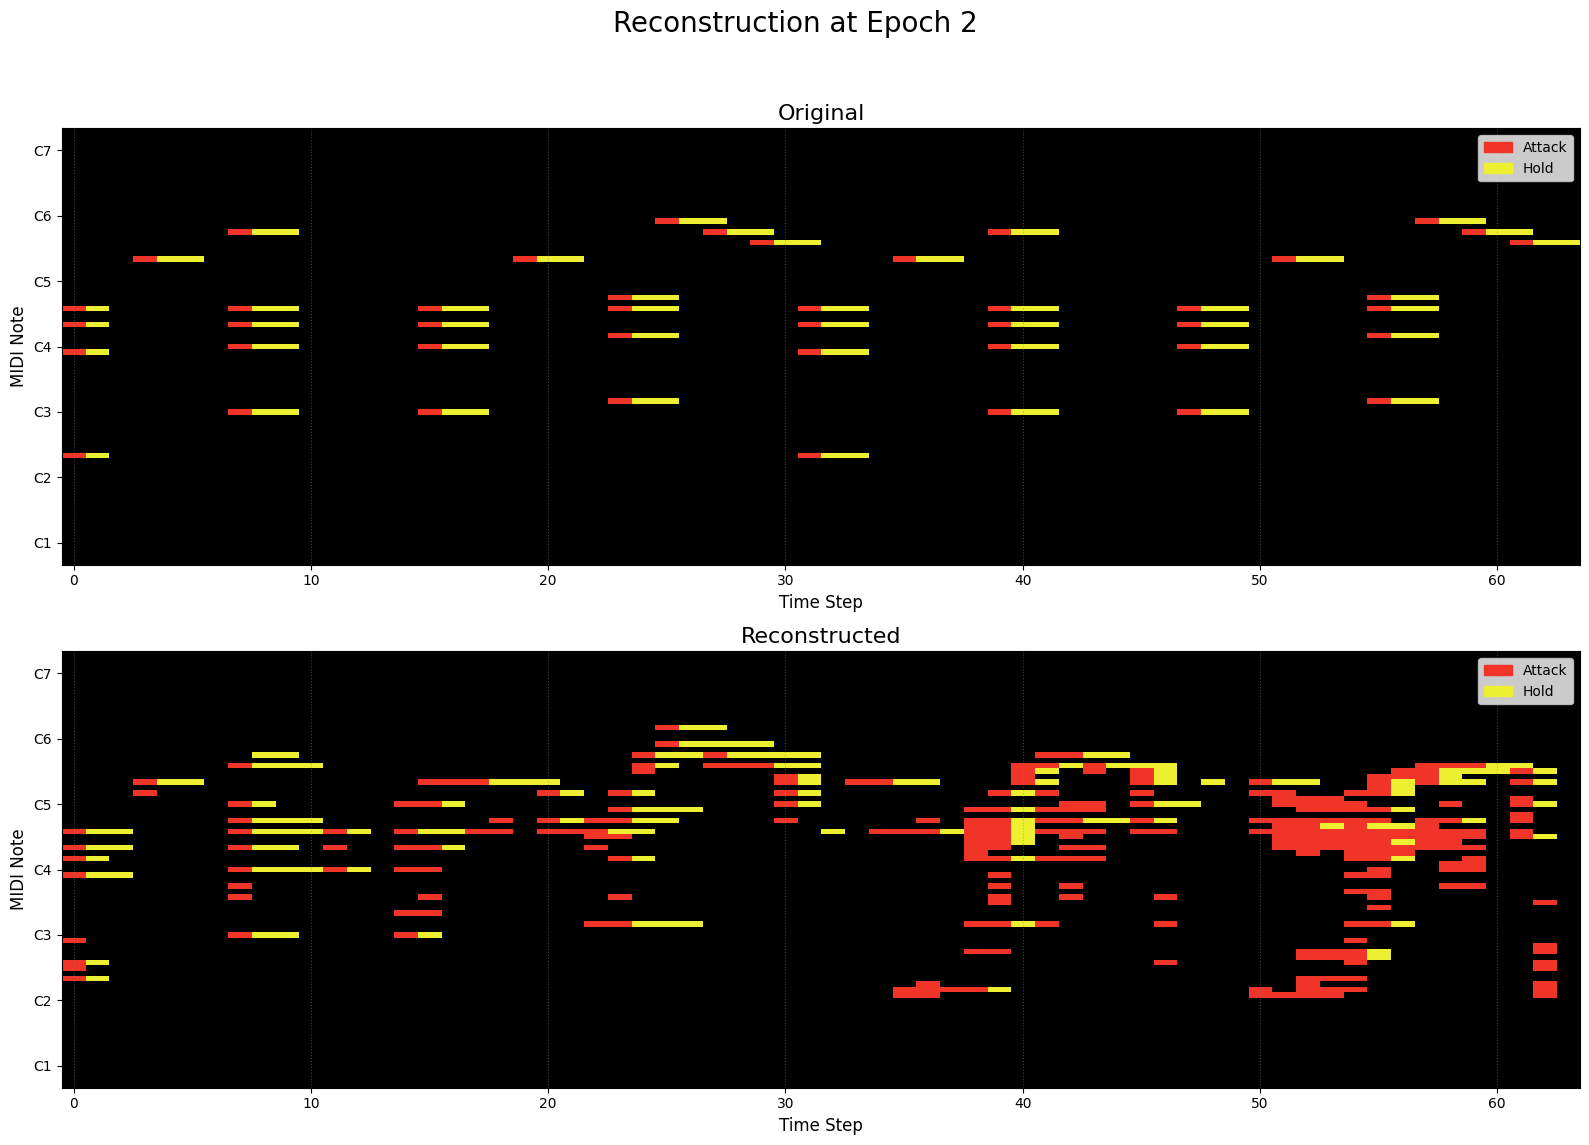

________________________________________________________________________________________________________________________


Epoch 4
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_4.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_4.mid...
MIDI file saved successfully.


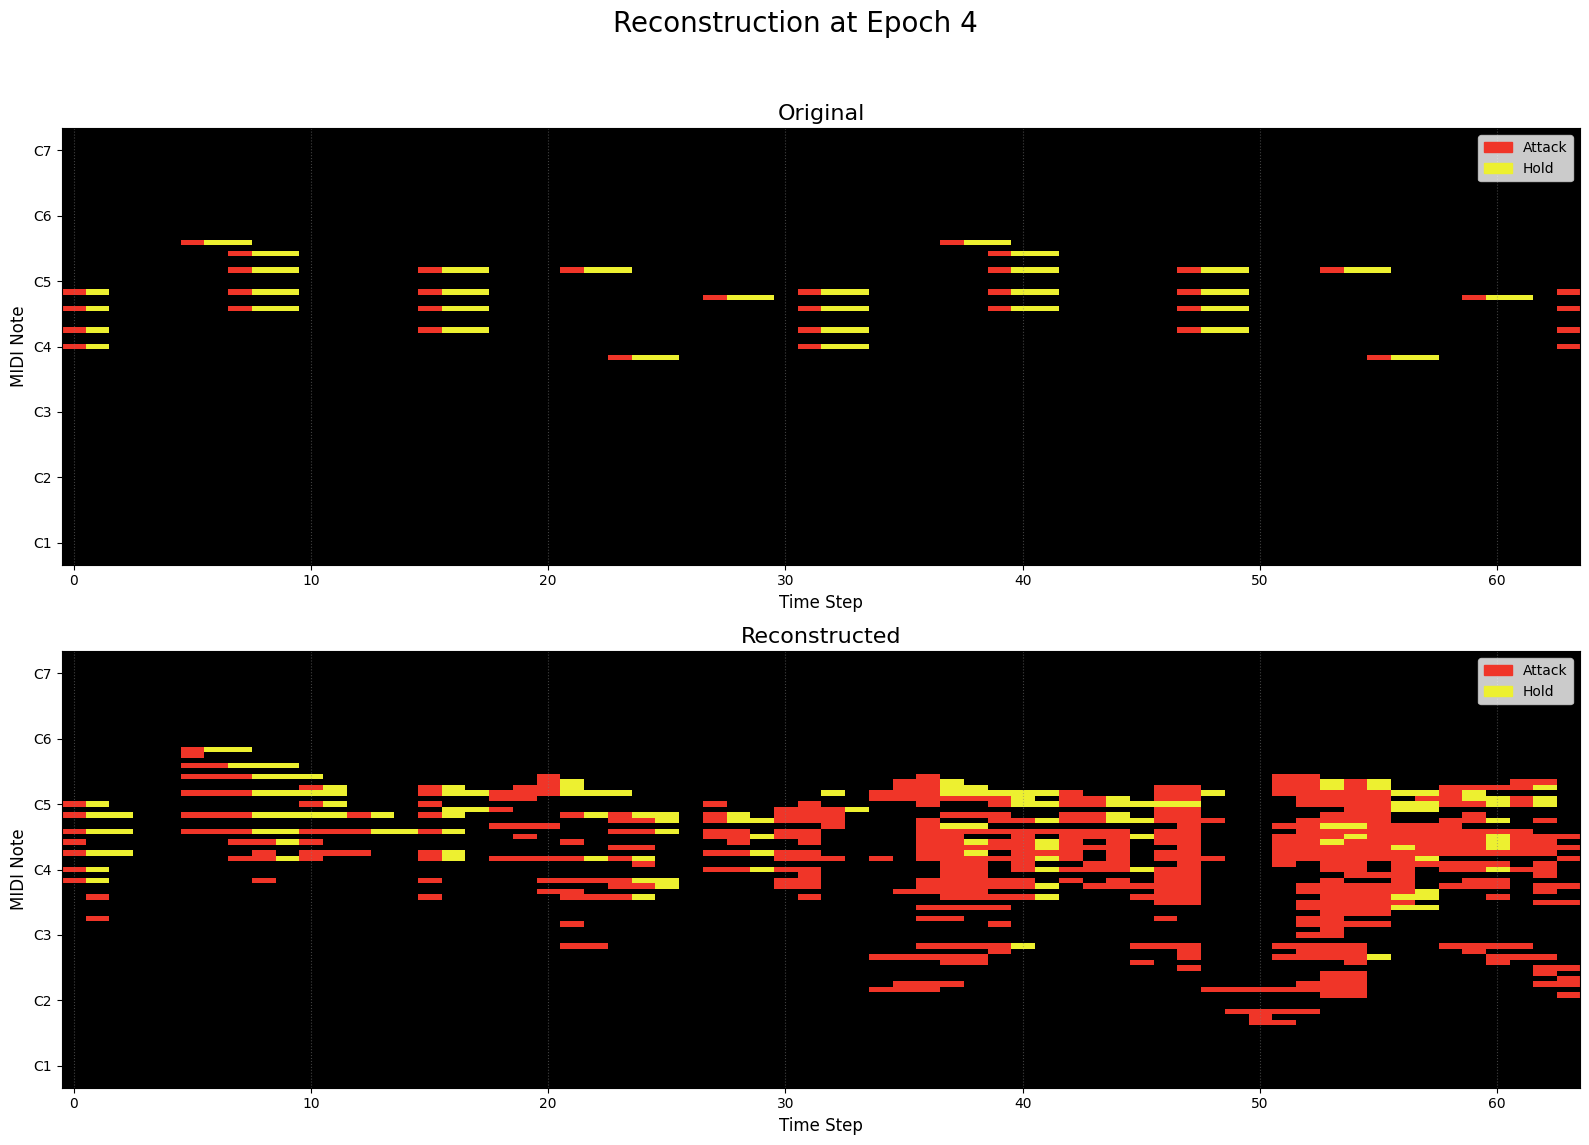

________________________________________________________________________________________________________________________


Epoch 6
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_6.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_6.mid...
MIDI file saved successfully.


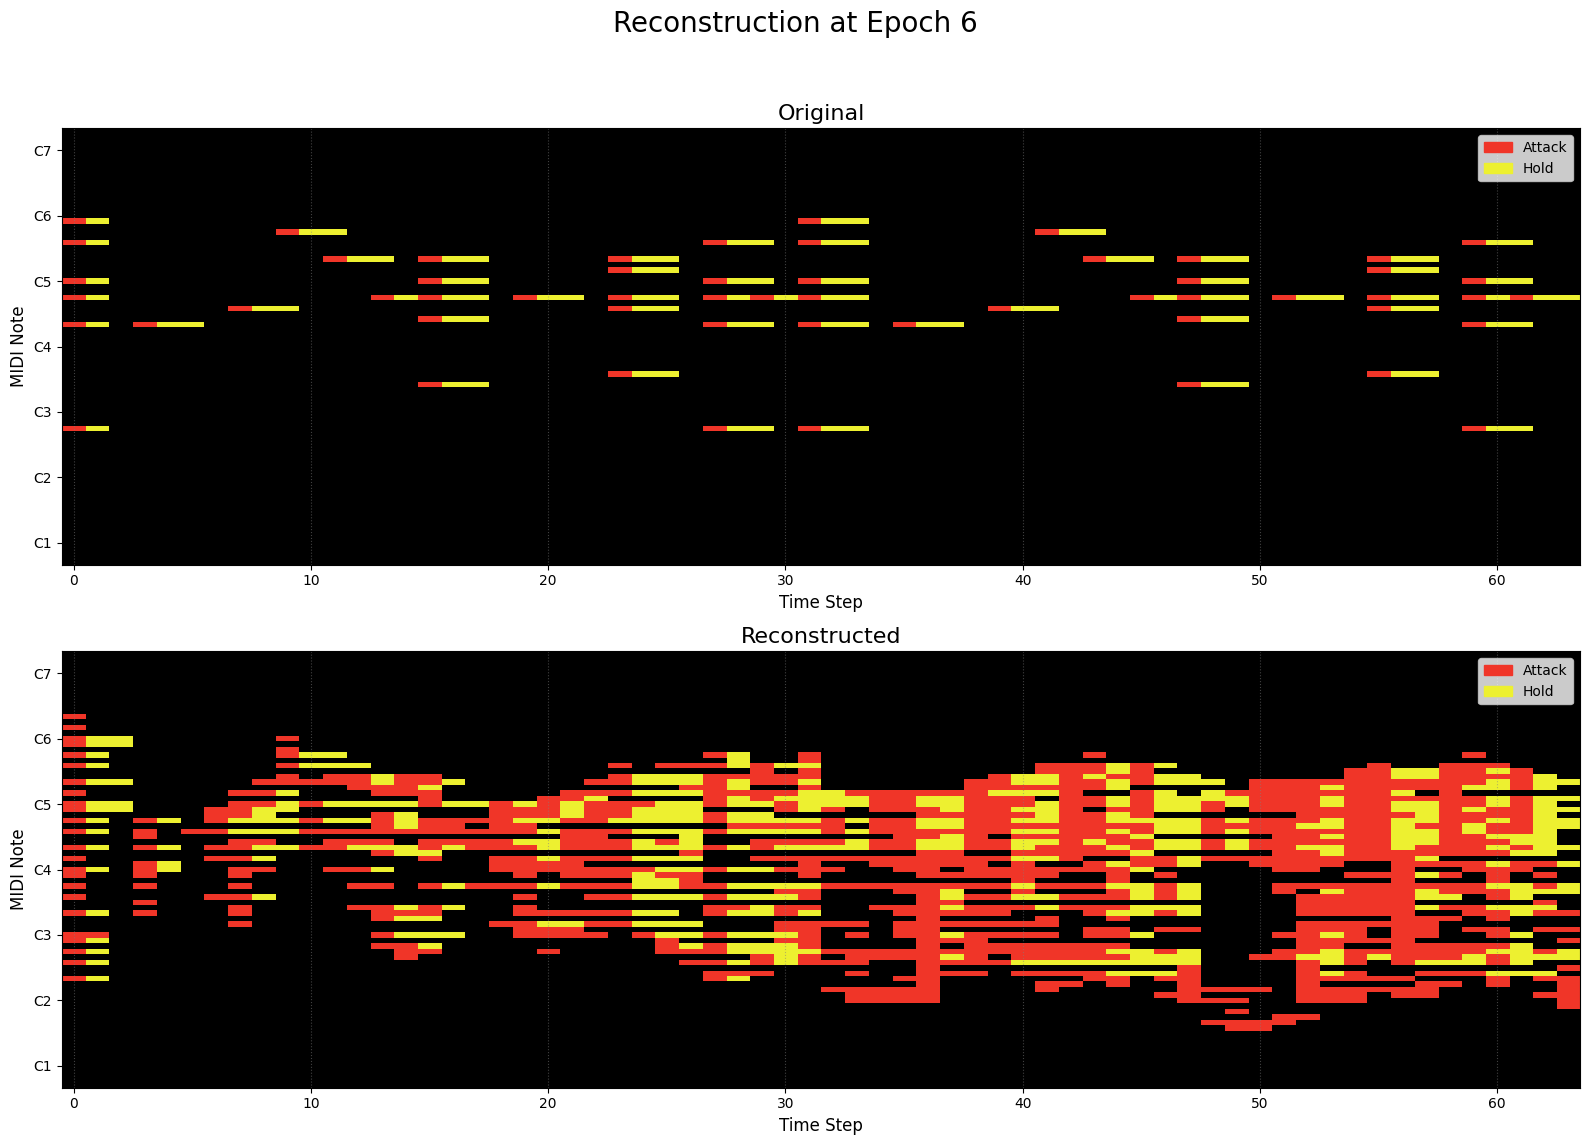

________________________________________________________________________________________________________________________


Epoch 8
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_8.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_8.mid...
MIDI file saved successfully.


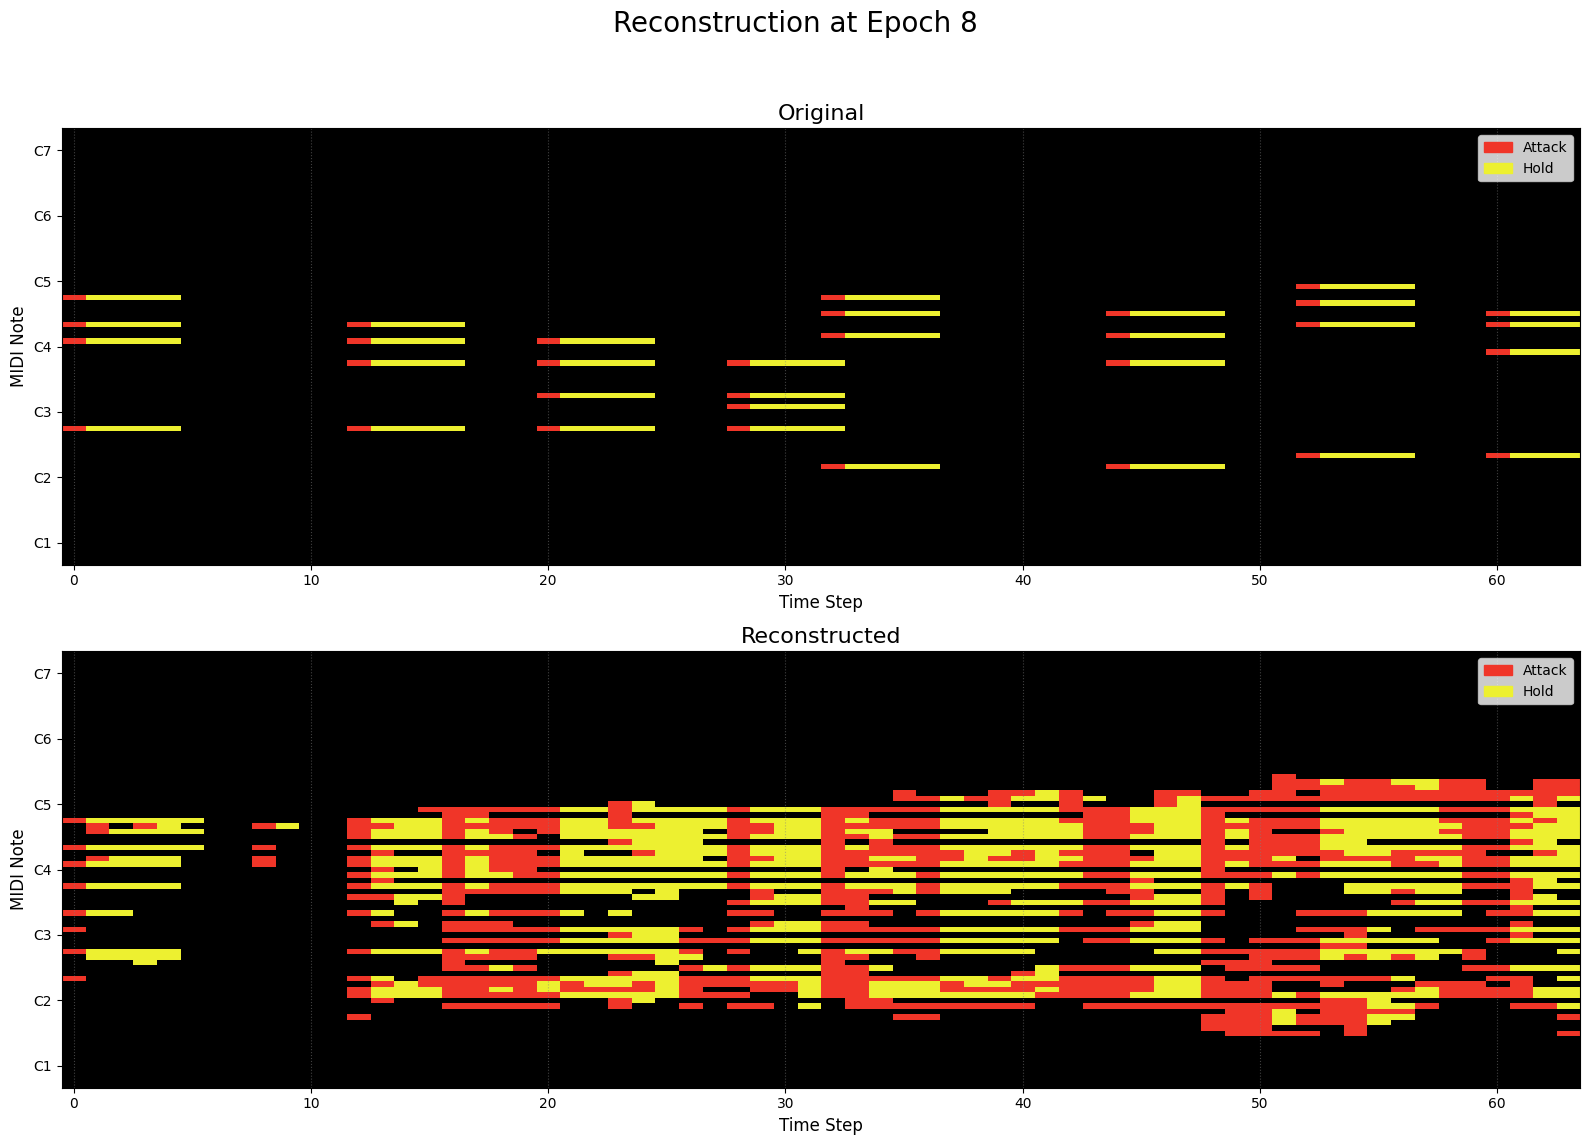

________________________________________________________________________________________________________________________


Epoch 10
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_10.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_10.mid...
MIDI file saved successfully.


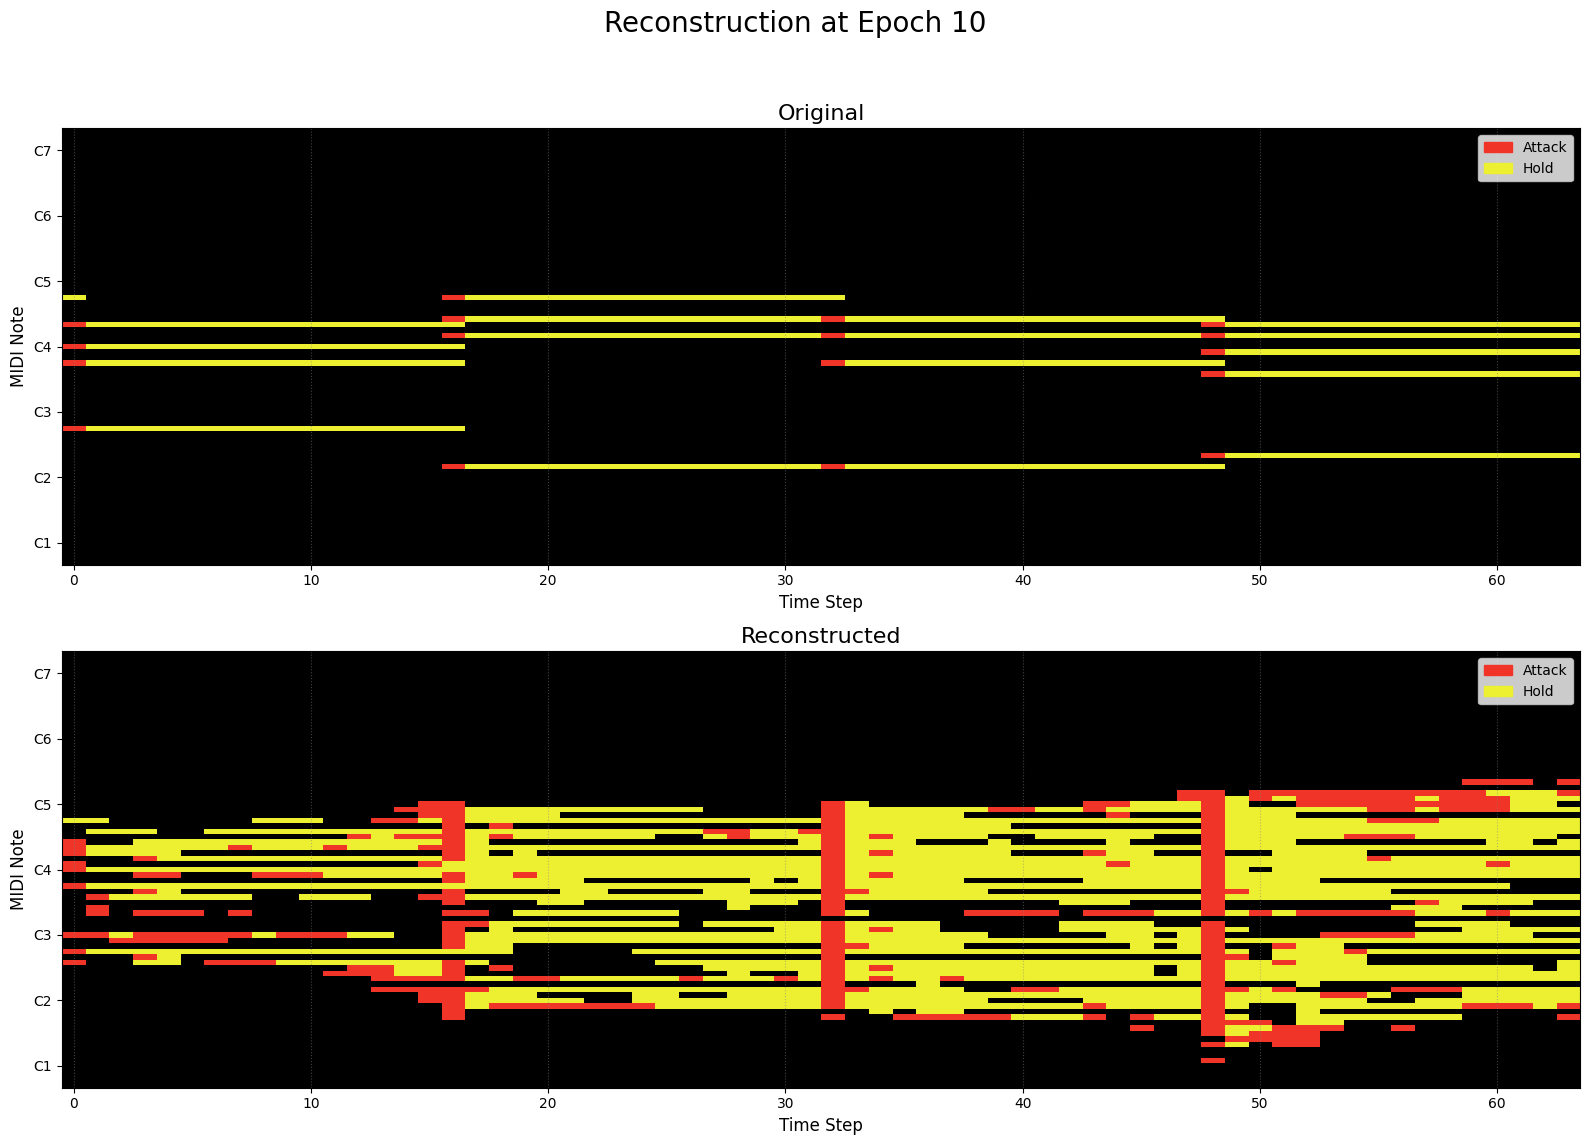

________________________________________________________________________________________________________________________


Epoch 12
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_12.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_12.mid...
MIDI file saved successfully.


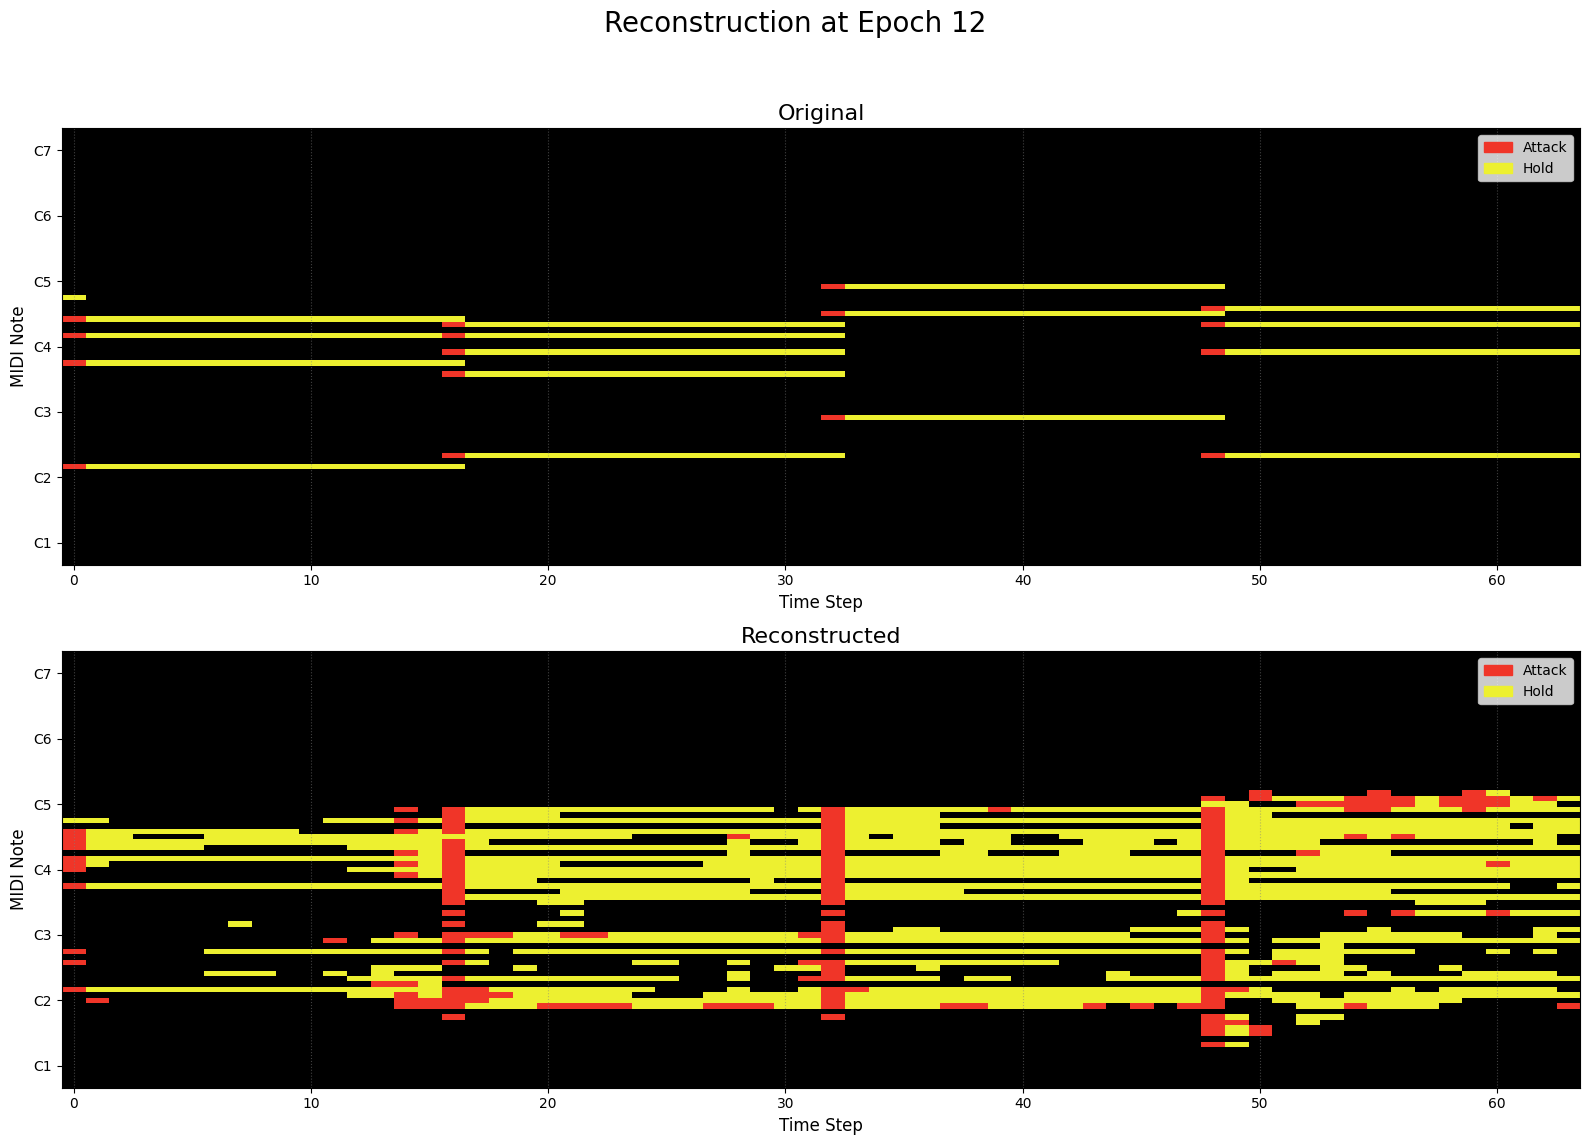

________________________________________________________________________________________________________________________


Epoch 14
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_14.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_14.mid...
MIDI file saved successfully.


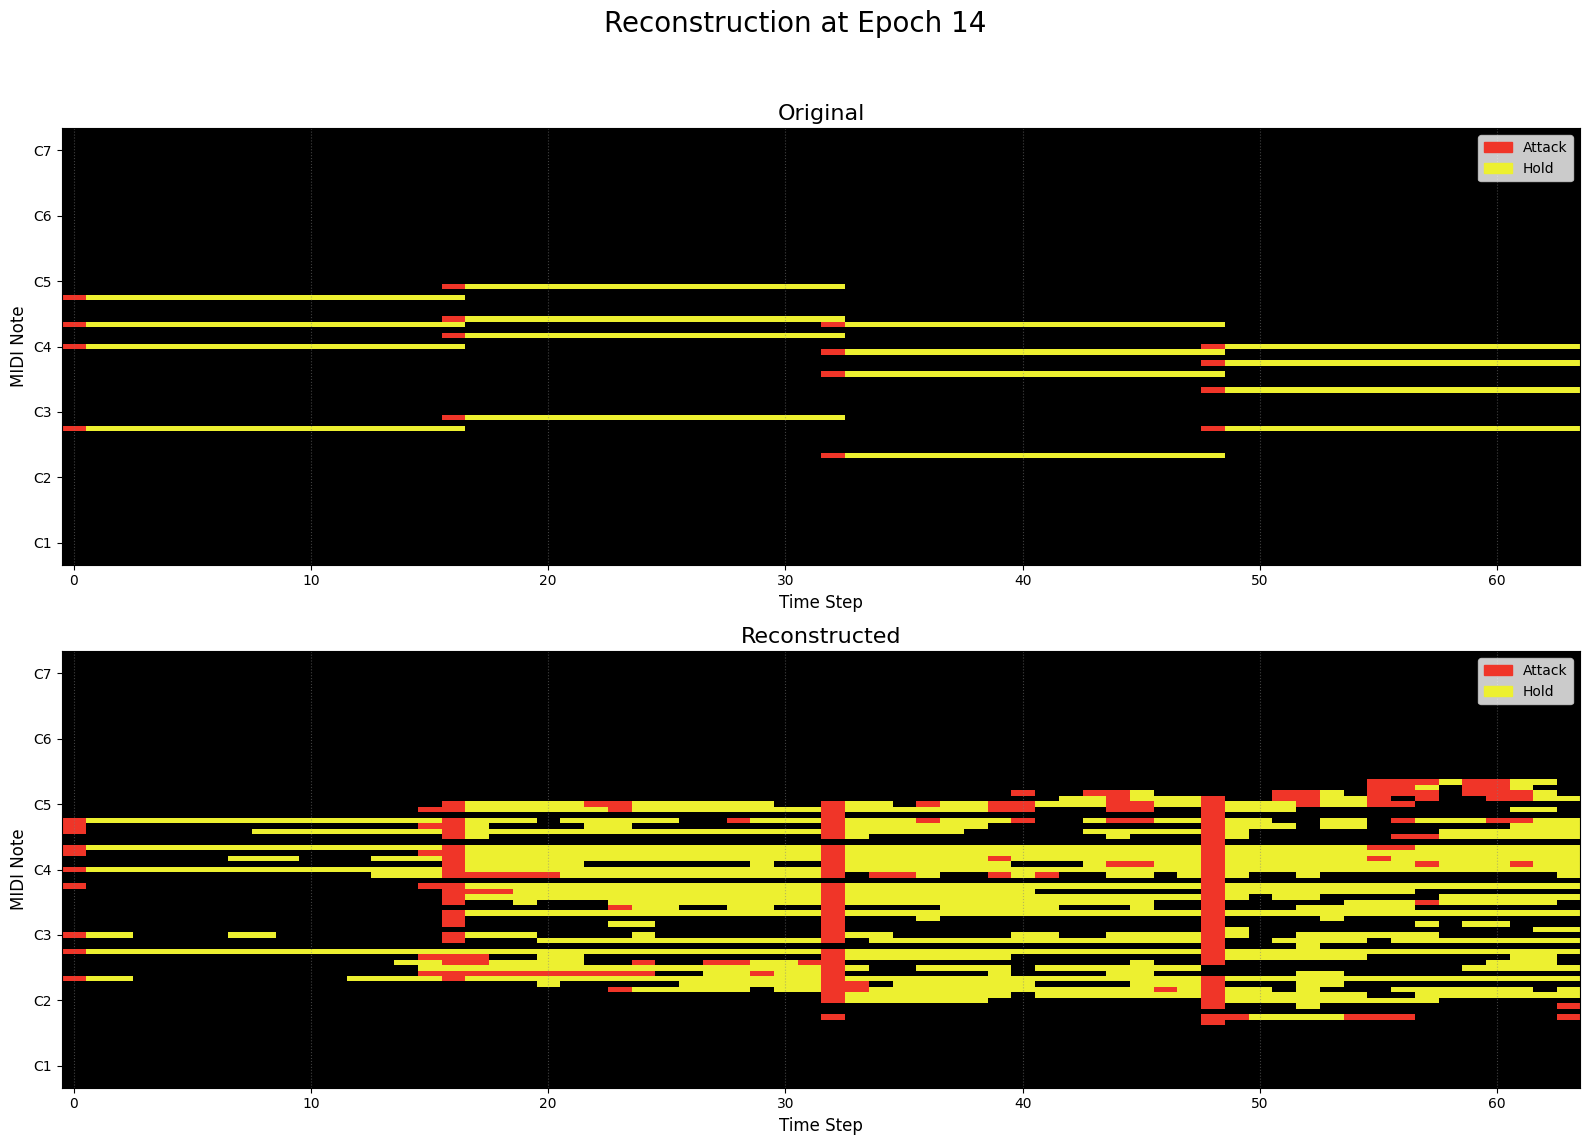

________________________________________________________________________________________________________________________


Epoch 16
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_16.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_16.mid...
MIDI file saved successfully.


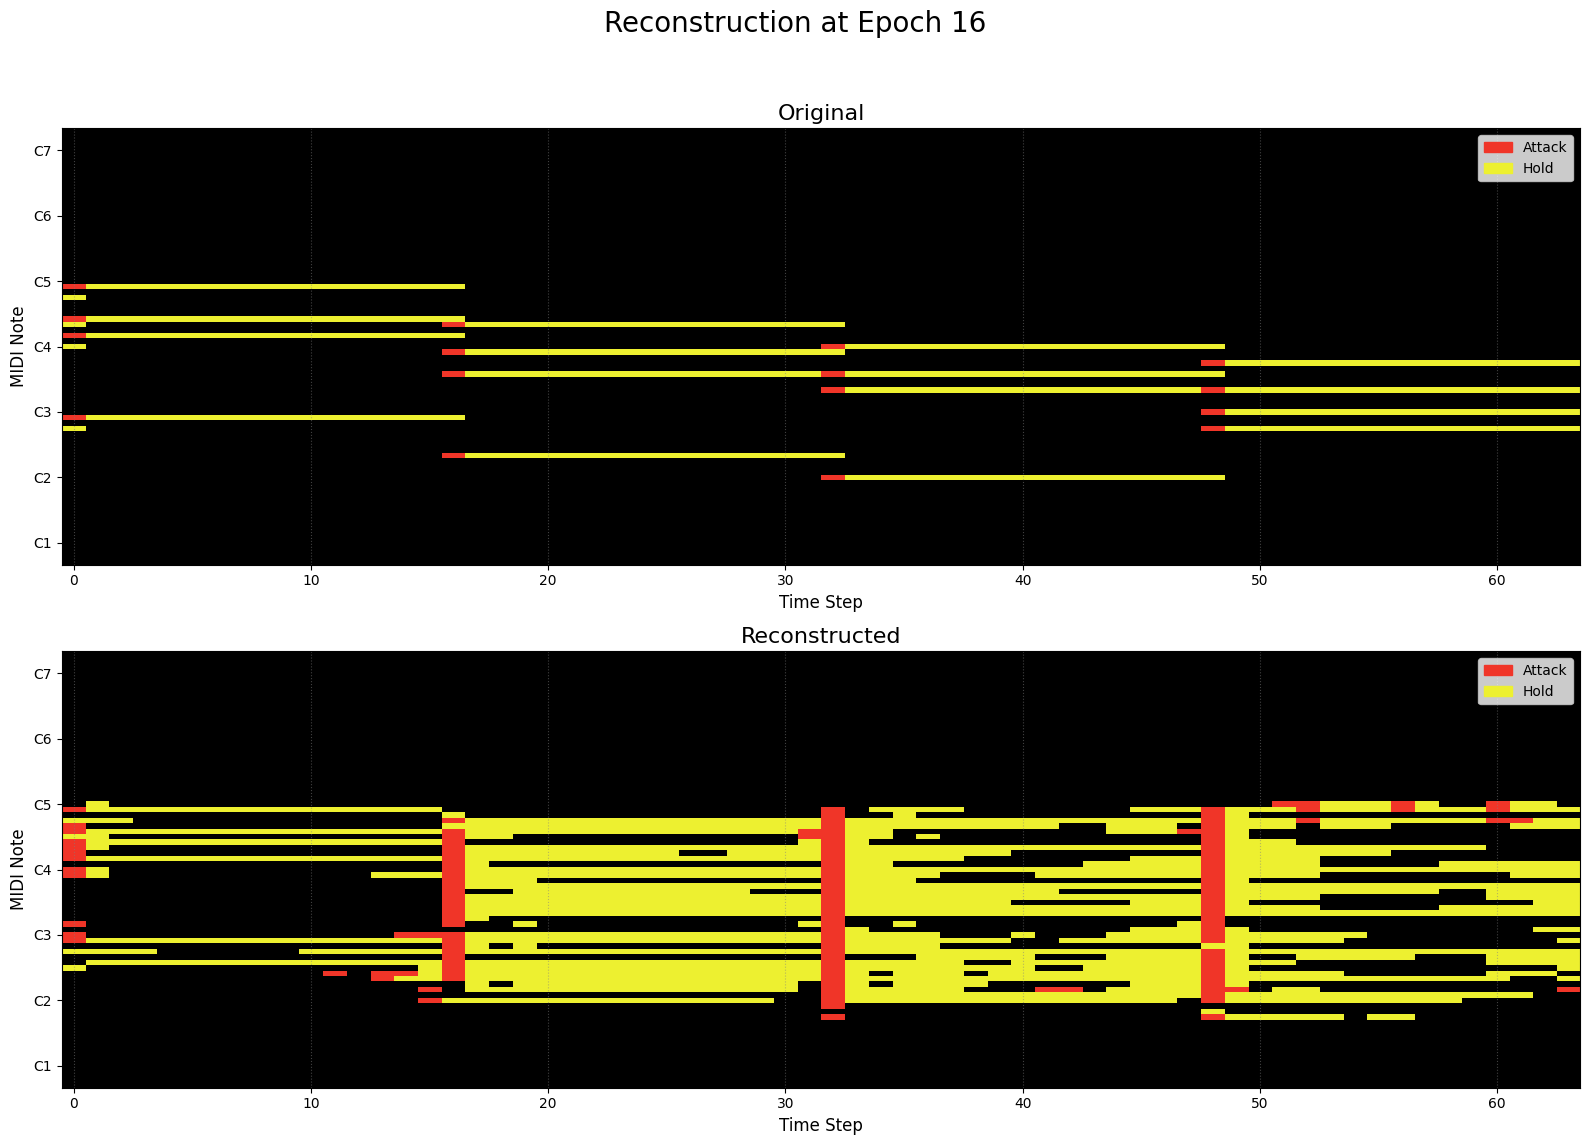

________________________________________________________________________________________________________________________


Epoch 18
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_18.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_18.mid...
MIDI file saved successfully.


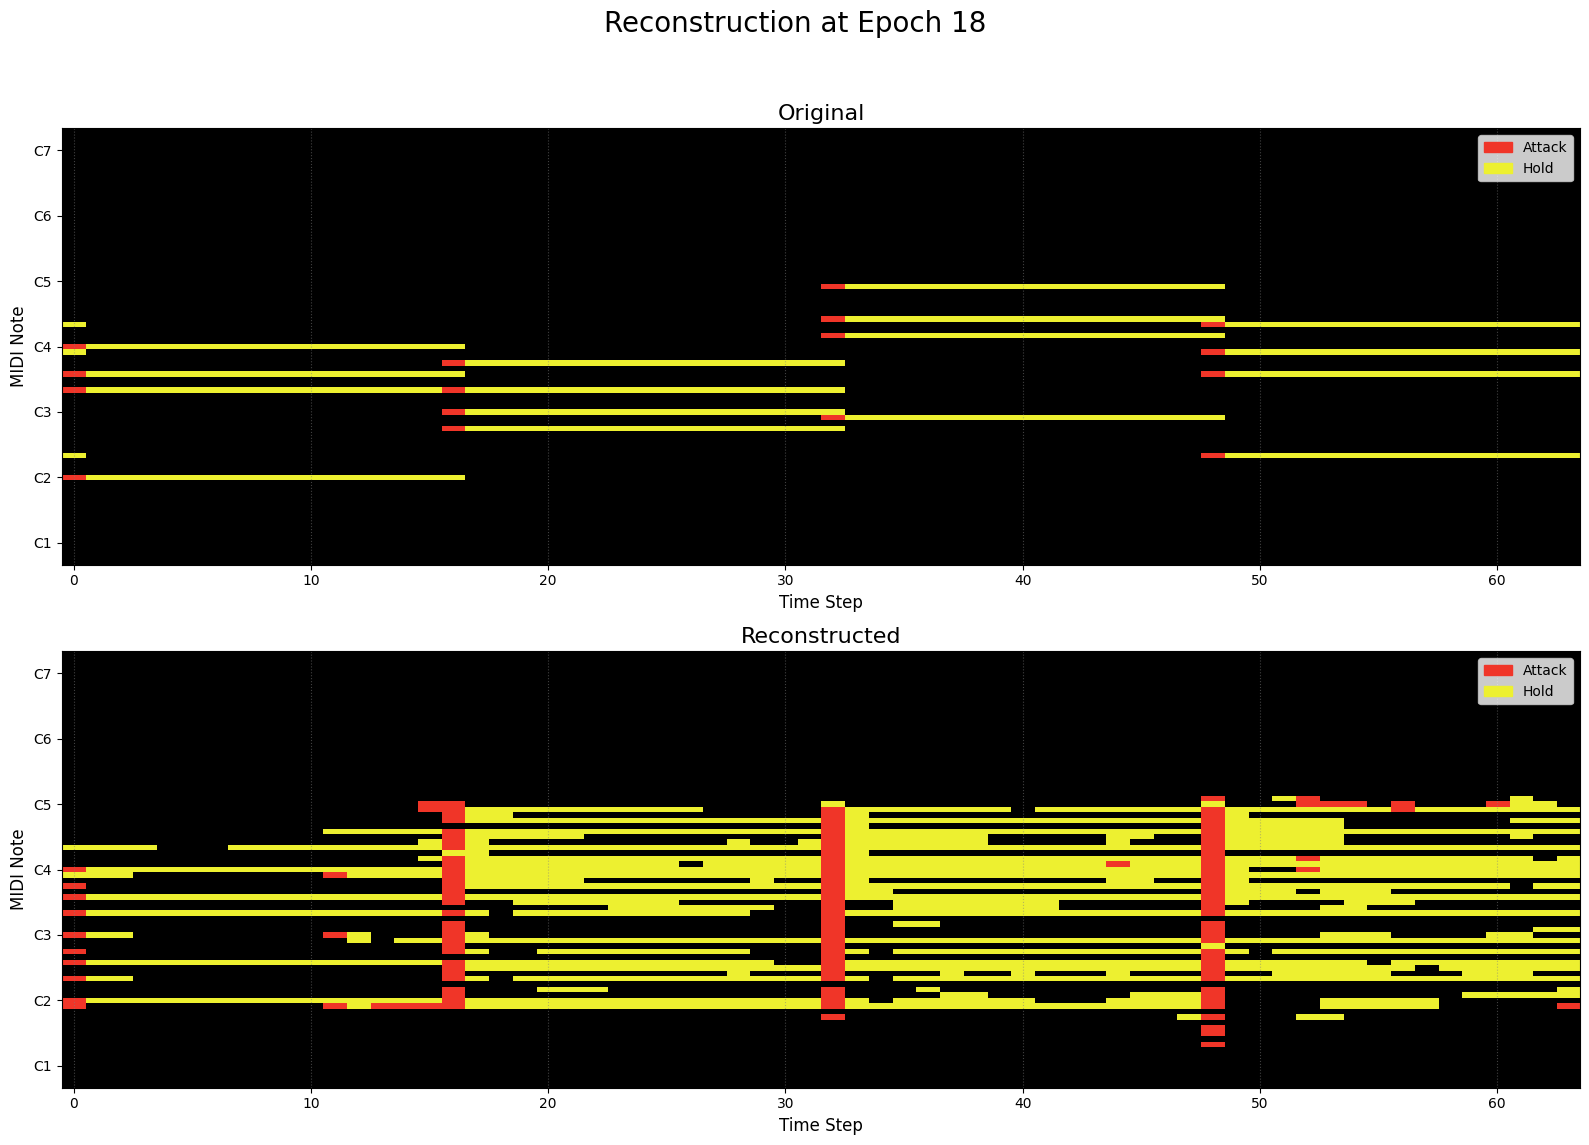

________________________________________________________________________________________________________________________




In [6]:
from matplotlib import pyplot as plt

for epoch in range(2, 20, 2):
    print(f"Epoch {epoch}")
    model = LofiModel()
    model.load_weights(rf"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model\lofi_model_epoch_{epoch}.pth")
    # model.load_weights(rf"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\big_model_pretraining\lofi_model_epoch_200.pth")
    original_sequence_tensor= dataset[epoch]
    # print(f"Processing file: {file_name}")
    reconstructions = model.reconstruct(original_sequence_tensor, output_path=f"reconstructed/lofi_model/reconstructed_{epoch}.mid")

    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(f"Reconstruction at Epoch {epoch}", fontsize=20)
    
    MidiDataset.visualize(original_sequence_tensor, title="Original", ax=axes[0], show_plot=False)
    MidiDataset.visualize(reconstructions, title="Reconstructed", ax=axes[1], show_plot=False)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    display(fig)
    plt.close(fig)
    
    print(60*"__"+"\n")
    print()